# Cyber Attack Detector


In [1]:
! pip install colabcode   #remove in local ipynb

Requested uvicorn==0.13.1 from https://files.pythonhosted.org/packages/ef/67/546c35e9fffb585ea0608ba3bdcafe17ae402e304367203d0b08d6c23051/uvicorn-0.13.1-py3-none-any.whl (from colabcode) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^
Please use pip<24.1 if you need to use this version.
INFO: pip is looking at multiple versions of colabcode to determine which version is compatible with other requirements. This could take a while.
  Using cached uvicorn-0.13.1-py3-none-any.whl.metadata (4.6 kB)
Requested uvicorn==0.13.1 from https://files.pythonhosted.org/packages/ef/67/546c35e9fffb585ea0608ba3bdcafe17ae402e304367203d0b08d6c23051/uvicorn-0.13.1-py3-none-any.whl (from colabcode) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^
Please use pip<24.1 if you need to use this versio

#Load the data sets (from google drive)

In [2]:
from google.colab import drive    #remove in local ipynb
drive.mount('/content/drive/')    #remove in local ipynb

Mounted at /content/drive/


Path

In [3]:
%cd /content/drive/My Drive/datasets/
#remove in local ipynb

/content/drive/My Drive/datasets


#Importing the libraries


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os


# Reading the dataset
Jenil (10/3) ~ until mention next author

In [5]:
train = pd.read_csv('UNSW_NB15_training-set.csv')
train

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [6]:
test = pd.read_csv('UNSW_NB15_test-set.csv')
test

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


### Finding categorical columns
if there are less than 5 discrete value -> assume as a categorical value

In [7]:
train_columns = []
test_columns = []

for col in train.columns:
  num_unique = len(train[col].unique())
  #print(num_unique)
  if(num_unique < 5):
    train_columns.append(col)

for col in test.columns:
  num_unique = len(test[col].unique())
  #print(num_unique)
  if(num_unique < 5):
    test_columns.append(col)

#Matching columns are the categorical columns
#print(train_columns, test_columns)
categorical_columns = list(set(train_columns).intersection(set(test_columns)))
categorical_columns.remove('label')   #y value  (attack_cat <> label

categorical_columns.append('proto')
categorical_columns.append('service')
categorical_columns.append('state')

categorical_columns

['is_ftp_login', 'ct_ftp_cmd', 'is_sm_ips_ports', 'proto', 'service', 'state']

# Filtering the categorical data



In [8]:
print(train.shape)
print(test.shape)

(175341, 45)
(82332, 45)


### Remove all the records with categorical values that only appear in training or test data

In [9]:
def filter_unique_categories(train, test, column):
    train_values = set(train[column].unique())
    test_values = set(test[column].unique())

    # Get unique values in train and test
    common_values = train_values.intersection(test_values)

    # Filter train and test datasets
    train_filtered = train[train[column].isin(common_values)]
    test_filtered = test[test[column].isin(common_values)]

    return train_filtered, test_filtered

# applying filter to each catogeriacal column
for column in categorical_columns:
    train, test = filter_unique_categories(train, test, column)

print(train.shape)
print(test.shape)

(175309, 45)
(82327, 45)


# Dropping rows with missing values




In [10]:
train.replace('-', np.nan, inplace=True)
test.replace('-', np.nan, inplace=True)
df_train = train.dropna()
df_test = test.dropna()

print(df_train.shape, df_test.shape)

df_train

(81157, 45) (35178, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [11]:
# savepoint - data cleaning/management done
df_train.to_csv('cleaned_train.csv', index=False)
df_test.to_csv('cleaned_test.csv', index=False)

#loading
df_train = pd.read_csv('cleaned_train.csv')
df_test = pd.read_csv('cleaned_test.csv')

# Encoding the data
Taekjin (10/4) ~ until mention next author

### Libraries and Functions

In [12]:
from collections.abc import Sequence
from sklearn import preprocessing

#for Classification
def to_xy(df, target):
    # Separate features and target variable
    x = df.drop(columns=[target])  # Drop the target column to get features
    y = pd.get_dummies(df[target])  # one-hot encoding for outputs

    # Convert the resulting arrays to float32
    return x.values.astype(np.float32), y.values.astype(np.float32)

def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

#encode for numeric values
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

In [13]:
numeric_columns = df_train.columns
numeric_columns = list(numeric_columns)

for x in categorical_columns:
    numeric_columns.remove(x)

numeric_columns.remove('id')    #output value
numeric_columns.remove('attack_cat')    #output value

### Encoding categorical values

In [14]:
df_train.drop('id', axis=1, inplace=True)
df_test.drop('id', axis=1, inplace=True)

#set y values to either 'label' or 'attack_cat' (not using)
df_train.drop('attack_cat', axis=1, inplace=True)
df_test.drop('attack_cat', axis=1, inplace=True)

#make other textual columns dummies
for df in [df_train, df_test]:
    for x in categorical_columns:
        encode_text_dummy(df, x)

#encode y values for both dataframe that we are using
attacks_train = encode_text_index(df_train, "label")
attacks_test = encode_text_index(df_test, "label")

Drop the column that train/test data doesn't have

In [15]:
train_columns = set(df_train.columns)
test_columns = set(df_test.columns)

common_columns = df_train.columns.intersection(df_test.columns)

df_train = df_train[common_columns]
df_test = df_test[common_columns]

df_train.shape, df_test.shape

((81157, 62), (35178, 62))

### Normalization (numeric values)

In [16]:
for df in [df_train, df_test]:
    for i in numeric_columns:
        encode_numeric_zscore(df, i)

### Split input/output values

In [17]:
x_train, y_train = to_xy(df_train, "label")
x_test, y_test = to_xy(df_test, "label")

In [18]:
# Print shapes of the resulting arrays to verify
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (81157, 61)
y_train shape: (81157, 2)
x_test shape: (35178, 61)
y_test shape: (35178, 2)


## Reshape the input values


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

cnn_x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1, 1)
cnn_x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1, 1)

In [20]:
cnn_x_train.shape, cnn_x_test.shape

((81157, 61, 1, 1), (35178, 61, 1, 1))

In [21]:
y_train.shape, y_test.shape

((81157, 2), (35178, 2))

# Define a CNN
Illya (10/5) & Danny (10/8) ~ until mention next author

In [22]:
model = Sequential()

model.add(Conv2D(64, kernel_size = (3,1), strides = (1, 1),
                padding = "valid",  activation = 'tanh',
                input_shape = cnn_x_train.shape[1:]))

model.add(MaxPooling2D(pool_size=(2, 1), strides=None))

model.add(Conv2D(128, (3, 1), activation='tanh'))

model.add(MaxPooling2D(pool_size=(2, 1), strides=None))

model.add(Flatten())
model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 59, 1, 64)           │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 29, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 1, 128)          │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 1, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1664)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         213,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 238,338 (931.01 KB)

 Trainable params: 238,338 (931.01 KB)

 Non-trainable params: 0 (0.00 B)

#Compiling the model


In [24]:
from tensorflow.keras.optimizers import Adam

model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


# Training the model
Illya   (10/8) ~ until mention next author

In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import time

start_time = time.time()

batch_size = 128

moniter = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=2, mode='auto')
checkpointer = ModelCheckpoint(filepath="dnn/intrusion_detect.keras", verbose=0, save_best_only=True)

model.fit(cnn_x_train, y_train,
          batch_size=batch_size,
          epochs=1000,
          verbose=2,
          validation_data=(cnn_x_test, y_test), callbacks=[moniter,checkpointer])

model.load_weights('dnn/intrusion_detect.keras')

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))


Epoch 1/1000
635/635 - 10s - 15ms/step - accuracy: 0.9771 - loss: 0.0666 - val_accuracy: 0.9201 - val_loss: 0.2262
Epoch 2/1000
635/635 - 2s - 3ms/step - accuracy: 0.9799 - loss: 0.0526 - val_accuracy: 0.9217 - val_loss: 0.1903
Epoch 3/1000
635/635 - 2s - 4ms/step - accuracy: 0.9813 - loss: 0.0472 - val_accuracy: 0.9320 - val_loss: 0.1313
Epoch 4/1000
635/635 - 2s - 4ms/step - accuracy: 0.9814 - loss: 0.0462 - val_accuracy: 0.9479 - val_loss: 0.0952
Epoch 5/1000
635/635 - 3s - 4ms/step - accuracy: 0.9819 - loss: 0.0453 - val_accuracy: 0.9233 - val_loss: 0.2022
Epoch 6/1000
635/635 - 2s - 3ms/step - accuracy: 0.9822 - loss: 0.0447 - val_accuracy: 0.9642 - val_loss: 0.0748
Epoch 7/1000
635/635 - 2s - 4ms/step - accuracy: 0.9819 - loss: 0.0447 - val_accuracy: 0.9583 - val_loss: 0.0780
Epoch 8/1000
635/635 - 2s - 3ms/step - accuracy: 0.9815 - loss: 0.0447 - val_accuracy: 0.9284 - val_loss: 0.1360
Epoch 9/1000
635/635 - 2s - 3ms/step - accuracy: 0.9825 - loss: 0.0432 - val_accuracy: 0.9239 

In [26]:
score = model.evaluate(cnn_x_train, y_train, verbose=0)
score

[0.049325764179229736, 0.9764900207519531]

In [27]:
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Test loss: 0.049325764179229736
Test accuracy: 0.9764900207519531


In [28]:
from sklearn import metrics

y_true = np.argmax(y_test,axis=1)
pred = model.predict(cnn_x_test)
pred = np.argmax(pred,axis=1)


score = metrics.accuracy_score(y_true, pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(y_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))


print(metrics.classification_report(y_true, pred))

1100/1100 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Accuracy: 0.9698106771277503
Averaged F1: 0.9695034385912638
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      9624
           1       0.97      0.99      0.98     25554

    accuracy                           0.97     35178
   macro avg       0.97      0.95      0.96     35178
weighted avg       0.97      0.97      0.97     35178



# Plot Functions

[[ 8796   828]
 [  234 25320]]
Plotting confusion matrix


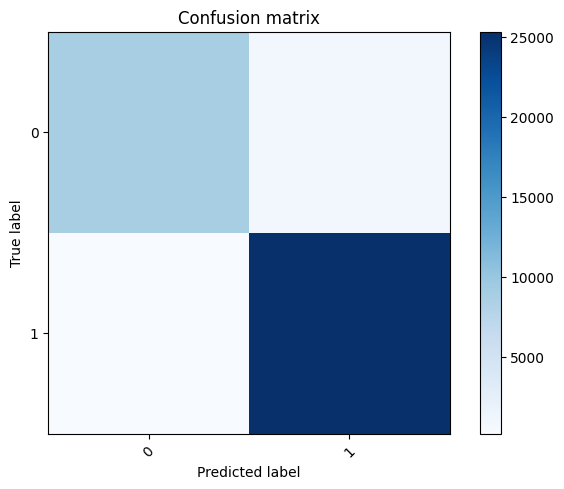

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      9624
           1       0.97      0.99      0.98     25554

    accuracy                           0.97     35178
   macro avg       0.97      0.95      0.96     35178
weighted avg       0.97      0.97      0.97     35178



In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

## Confusion Matrix

[[ 8796   828]
 [  234 25320]]
Plotting confusion matrix


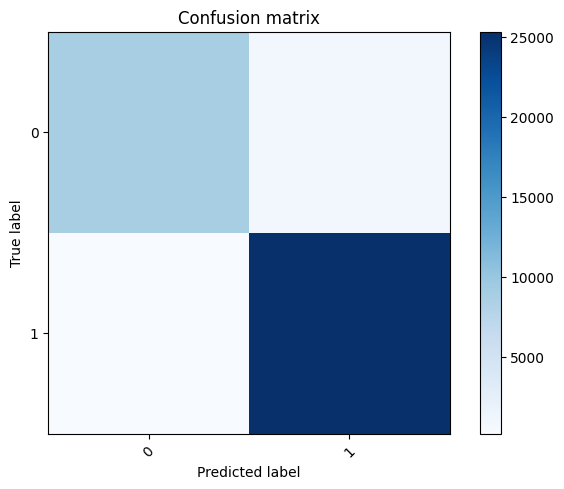

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      9624
           1       0.97      0.99      0.98     25554

    accuracy                           0.97     35178
   macro avg       0.97      0.95      0.96     35178
weighted avg       0.97      0.97      0.97     35178



In [30]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_true, pred)
print(cm)


print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, attacks_train)
plt.show()

print(classification_report(y_true, pred))

## ROC

1100/1100 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


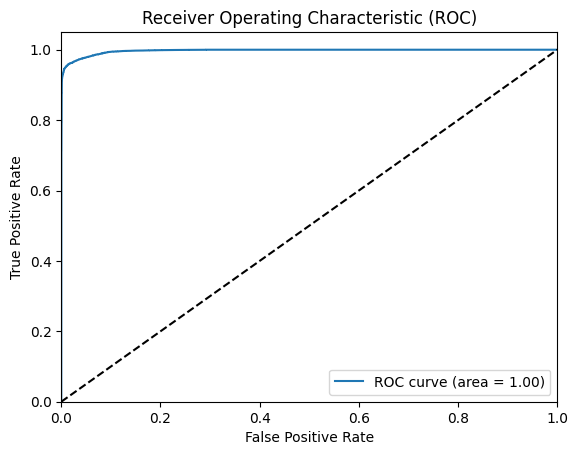

In [31]:
pred = model.predict(cnn_x_test)
pred = pred[:,1]
plot_roc(pred,y_true)